# Explore with data

In [2]:
# imports
import os.path as osp
import pandas as pd
from tifffile import tifffile as tif
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# paths
data_path = '../../../data'
csv_path = osp.join(data_path, 'image_series.csv')
series = pd.read_csv(csv_path)

s1_path = osp.join(data_path, 's1')  # contains VV and VH
s2_path = osp.join(data_path, 's2')  # contains LAI
s2m_path = osp.join(data_path, 's2-mask')

## LAI negative

In [4]:
neg = 0
for row in series.itertuples():
    lai = np.hstack([
        tif.imread(osp.join(s2_path, row[1])),
        tif.imread(osp.join(s2_path, row[2])),
        tif.imread(osp.join(s2_path, row[3]))])
    if np.count_nonzero(lai < 0) > 0:
        neg += 1
print('proportion of images contining negative lai:', neg / 7635)

proportion of images contining negative: 0.8722986247544204


## Mask exploration

In [5]:
def mask(img_mask):
    """Transform an S2 mask (values between 1 and 9) to float32 binary.

    It uses the simple filter:
    0, 1, 7, 8, 9 -> 0 (incorrect data)
    other -> 1 (correct data)
    """
    interm = np.where(img_mask < 2, 0.0, 1.0)
    return np.where(img_mask > 6, 0.0, interm)

In [31]:
for n in [0.05*256*256, 0.1*256*256, 0.2*256*256, 0.33*256*256]:
    c = 0
    for row in series.itertuples():
        mask_1 = mask(tif.imread(osp.join(s2m_path, row[2])))
        zeros = np.count_nonzero(mask_1 == 0)
        if zeros > n:
            c += 1
    print(f'{100 * c / 7635:.1f}% of the images have more than '
          f'{100*n/(256*256):.1f}% of the pixels missing')

7.1% of the images have more than 5.0% of the pixels missing
5.2% of the images have more than 10.0% of the pixels missing
3.6% of the images have more than 20.0% of the pixels missing
2.6% of the images have more than 33.0% of the pixels missing


## Grid exploration

In [15]:
grids = {}
i_m = 0
for line in series.itertuples():
    name = line[1]
    split = name.split('-')
    head, row, col = '-'.join(split[:5]), int(split[7]), int(split[8].split('.')[0])
    if head not in grids:
        grids[head] = np.zeros((33, 33), dtype=np.uint8)
    grids[head][row, col] = 1

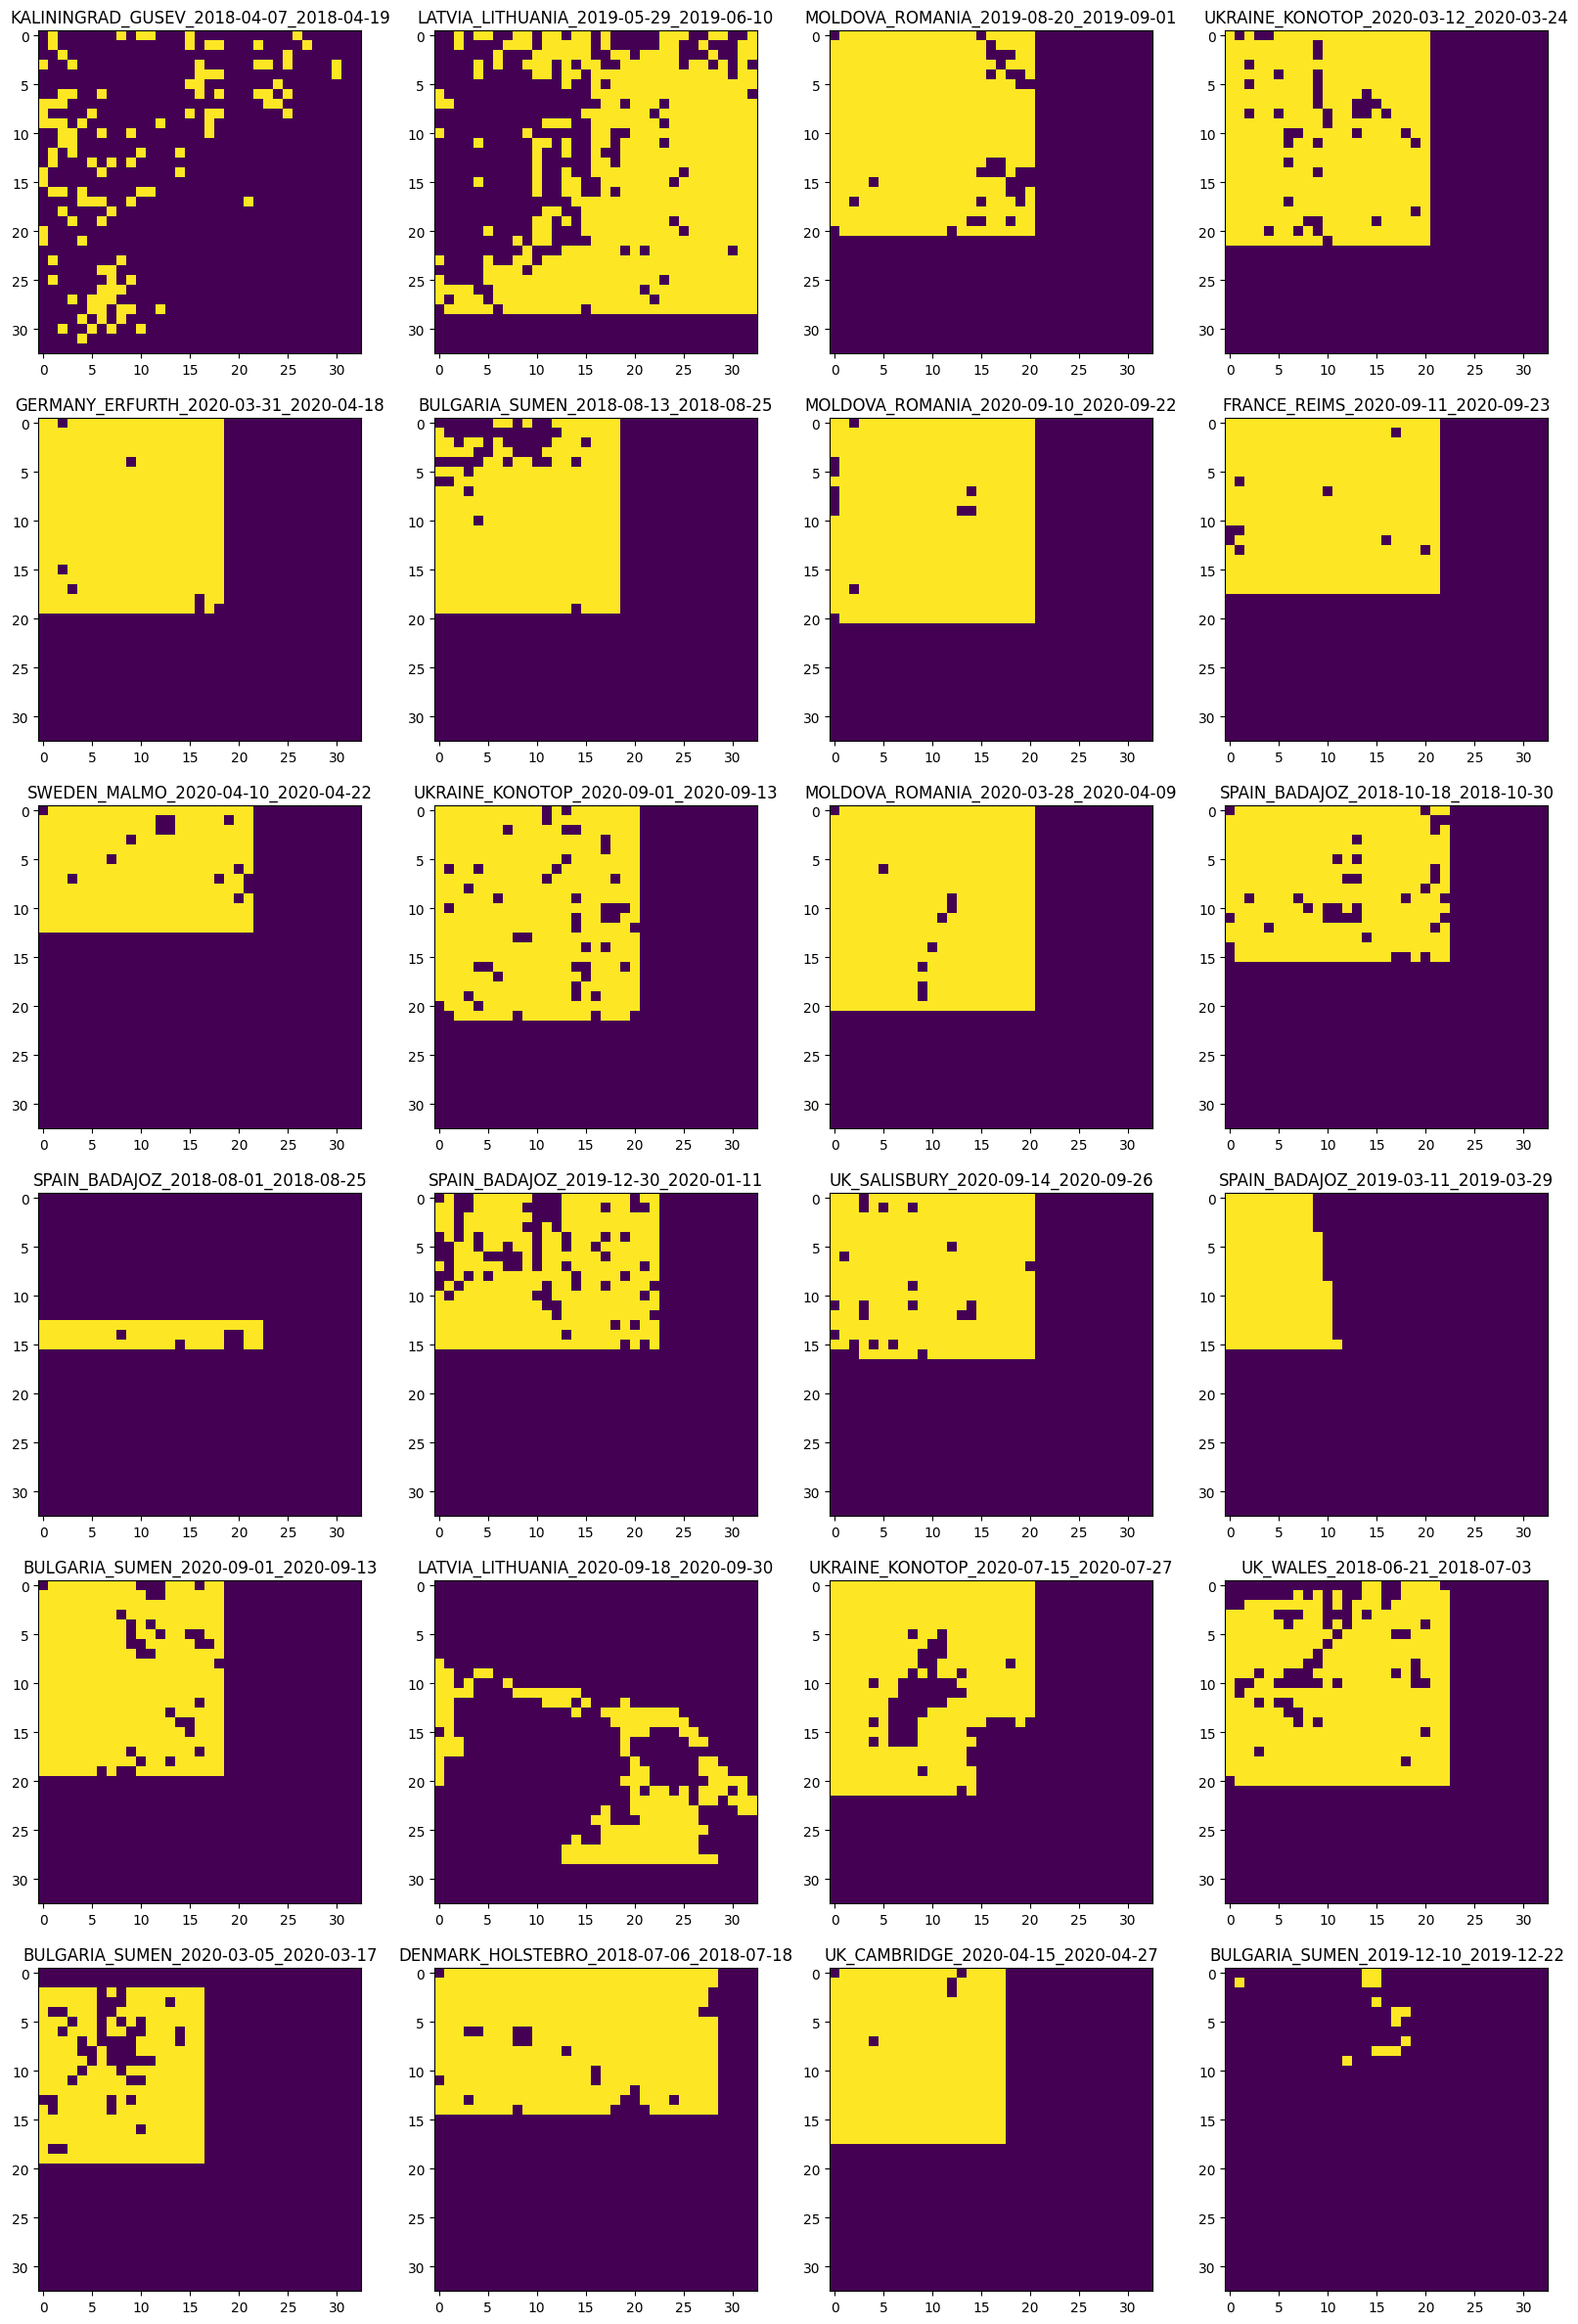

In [23]:
fig, axes = plt.subplots(6, 4, figsize=(20, 30))
for i, key in enumerate(grids.keys()):
    ax = axes[i // 4, i % 4]
    ax.imshow(grids[key])
    ax.set_title(key)
    
plt.show()